This is an example notebook to create a Word2Vec model using darija dataset

## Imports

In [1]:
import pandas as pd  # For data handling
import multiprocessing

import nltk
from nltk.tokenize import RegexpTokenizer

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

## Load Data

In [2]:
df = pd.read_csv('./dataset/sentences.csv')
df.shape

(10001, 2)

In [3]:
df.head()

,english,darija
0,"They're hiding something, I'm sure!","homa mkhbbyin chi haja, ana mti99en!"
1,It's obvious they're trying to keep their cool.,bayna homa tay7awlo ib9aw mbrrdin.
2,the hotels don't seem very comfortable.,loTilat mabaynach fihom mori7in bzzaf.
3,he is probably about to be laid off by head of...,ghaliban ghayjrriw 3lih mn lkhdma!
4,of course he's depressive!,Tab3an rah mkta2eb!


## Check for missing values

In [4]:
df.isnull().sum()

english    0
darija     0
dtype: int64

## Cleaning

In [5]:
df['darija']

0          homa mkhbbyin chi haja, ana mti99en!
1            bayna homa tay7awlo ib9aw mbrrdin.
2        loTilat mabaynach fihom mori7in bzzaf.
3            ghaliban ghayjrriw 3lih mn lkhdma!
4                           Tab3an rah mkta2eb!
                          ...                  
9996                    makaynch ttamarin lyoum
9997                              rje3 lblaStek
9998                     wach mcha 3lik TTobis?
9999                     chkoun tgheyyeb lyoum?
10000                          baraka mn l8eDra
Name: darija, Length: 10001, dtype: object

In [6]:
tokenizer = RegexpTokenizer(r'\w+')

tokenized_df=[tokenizer.tokenize(sent.lower()) for sent in df['darija']]


In [7]:
tokenized_df

[['homa', 'mkhbbyin', 'chi', 'haja', 'ana', 'mti99en'],
 ['bayna', 'homa', 'tay7awlo', 'ib9aw', 'mbrrdin'],
 ['lotilat', 'mabaynach', 'fihom', 'mori7in', 'bzzaf'],
 ['ghaliban', 'ghayjrriw', '3lih', 'mn', 'lkhdma'],
 ['tab3an', 'rah', 'mkta2eb'],
 ['tayballia', 'ghanmchi'],
 ['ara', 'lia', 'dak', 'sac'],
 ['ghanmred'],
 ['knt', 'dima', '3arf', 'annaha', 'bghatna', 'nmoutou'],
 ['bghit', 'n3ref', 'ch7al', 'b9a', 'lia', 'tlwe9t', 'bach', 'n9ra'],
 ['ghaykon', '3ndna', 'mti7an', 'ala', 'hadchi', 'lli', '9sedti'],
 ['ssimana', 'jjaya', 'nhar', 'lkhmis'],
 ['ghanghttiw', 'ga3', 'lmawad', 'tal', 'tlat', 'jjay'],
 ['ewa', 'bda', 'l9raya', 'bkri'],
 ['wakha',
  'ala',
  '3ndi',
  'ay',
  'as2ila',
  'wach',
  'nsifthom',
  'lik',
  'f',
  'email'],
 ['walakin', 'ghanjawb', '3lihom', 'fl', 'aw9at', 't', 'lkhdma'],
 ['idan', '3afak', 'matsifthomch', 'm3ttel', 'nhar', 'larb3', 'bl3chia'],
 ['chokran', 'a', 'lalla'],
 ['ach', 'kay3ni', 'hadchi'],
 ['kifach', 'ktabk', 'ghay3awnni', 'nt8dden'],
 ['t

### Generate some stats

In [8]:
all_df=sum(tokenized_df,[])
all_words=nltk.FreqDist(w for w in all_df if not w.isnumeric() )
all_words.most_common()[:10]

[('wach', 777),
 ('o', 625),
 ('dyal', 541),
 ('f', 525),
 ('ghadi', 517),
 ('ana', 513),
 ('chi', 496),
 ('l', 409),
 ('3la', 397),
 ('mn', 394)]

In [9]:
len(all_df)

44363

In [10]:
lengths=[len(sent) for sent in tokenized_df]
lengths_dist=nltk.FreqDist(l for l in lengths)

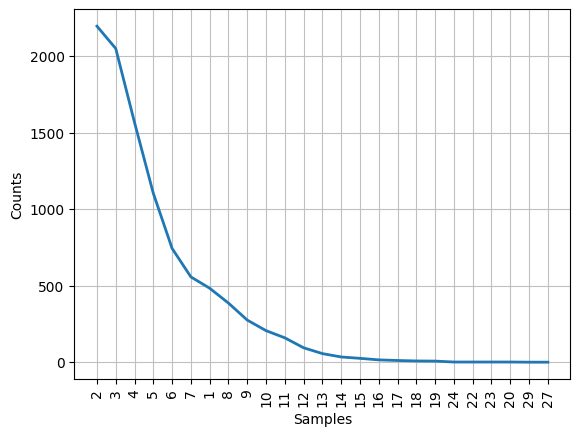

<Axes: xlabel='Samples', ylabel='Counts'>

In [11]:
lengths_dist.plot()

## Using Phrases to detect common phrases (we use bigrams)

In [12]:
phrases = Phrases(tokenized_df)


INFO - 19:16:22: collecting all words and their counts
INFO - 19:16:22: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 19:16:22: PROGRESS: at sentence #10000, processed 44360 words and 40225 word types
INFO - 19:16:22: collected 40226 token types (unigram + bigrams) from a corpus of 44363 words and 10001 sentences
INFO - 19:16:22: merged Phrases<40226 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
INFO - 19:16:22: Phrases lifecycle event {'msg': 'built Phrases<40226 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000> in 0.03s', 'datetime': '2024-01-06T19:16:22.491307', 'gensim': '4.3.2', 'python': '3.10.6 (main, Oct  7 2022, 20:19:58) [GCC 11.2.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.35', 'event': 'created'}


In [13]:
bigram = Phraser(phrases)


INFO - 19:16:22: exporting phrases from Phrases<40226 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>
INFO - 19:16:22: FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<112 phrases, min_count=5, threshold=10.0> from Phrases<40226 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000> in 0.04s', 'datetime': '2024-01-06T19:16:22.531037', 'gensim': '4.3.2', 'python': '3.10.6 (main, Oct  7 2022, 20:19:58) [GCC 11.2.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.35', 'event': 'created'}


## Training the model

In [14]:
cores = multiprocessing.cpu_count() # number of cores to set training workers


In [15]:
# start with default parameters
w2v_model = Word2Vec(min_count=5,
                     window=5,
                     vector_size=300,
                     sample=0.001, 
                     alpha=0.025, 
                     min_alpha=0.0001, 
                     negative=20,
                     workers=cores-2)

INFO - 19:16:22: Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=300, alpha=0.025>', 'datetime': '2024-01-06T19:16:22.538013', 'gensim': '4.3.2', 'python': '3.10.6 (main, Oct  7 2022, 20:19:58) [GCC 11.2.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.35', 'event': 'created'}


In [16]:
w2v_model.build_vocab(tokenized_df, progress_per=10000)


INFO - 19:16:22: collecting all words and their counts
INFO - 19:16:22: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 19:16:22: PROGRESS: at sentence #10000, processed 44360 words, keeping 12090 word types
INFO - 19:16:22: collected 12090 word types from a corpus of 44363 raw words and 10001 sentences
INFO - 19:16:22: Creating a fresh vocabulary
INFO - 19:16:22: Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 1288 unique words (10.65% of original 12090, drops 10802)', 'datetime': '2024-01-06T19:16:22.555472', 'gensim': '4.3.2', 'python': '3.10.6 (main, Oct  7 2022, 20:19:58) [GCC 11.2.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.35', 'event': 'prepare_vocab'}
INFO - 19:16:22: Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 29130 word corpus (65.66% of original 44363, drops 15233)', 'datetime': '2024-01-06T19:16:22.555916', 'gensim': '4.3.2', 'python': '3.10.6 (main, Oct  7 2022, 20:19:58) [GCC 11.2.0]', 'platform'

In [17]:
w2v_model.train(tokenized_df, total_examples=w2v_model.corpus_count, epochs=10, report_delay=1)

INFO - 19:16:22: Word2Vec lifecycle event {'msg': 'training model with 10 workers on 1288 vocabulary and 300 features, using sg=0 hs=0 sample=0.001 negative=20 window=5 shrink_windows=True', 'datetime': '2024-01-06T19:16:22.574165', 'gensim': '4.3.2', 'python': '3.10.6 (main, Oct  7 2022, 20:19:58) [GCC 11.2.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.35', 'event': 'train'}
INFO - 19:16:22: EPOCH 0: training on 44363 raw words (22668 effective words) took 0.0s, 799596 effective words/s
INFO - 19:16:22: EPOCH 1: training on 44363 raw words (22741 effective words) took 0.0s, 763533 effective words/s
INFO - 19:16:22: EPOCH 2: training on 44363 raw words (22808 effective words) took 0.0s, 781223 effective words/s
INFO - 19:16:22: EPOCH 3: training on 44363 raw words (22720 effective words) took 0.0s, 804941 effective words/s
INFO - 19:16:22: EPOCH 4: training on 44363 raw words (22608 effective words) took 0.0s, 672596 effective words/s
INFO - 19:16:22: EPOCH 5: training on

(226904, 443630)

In [18]:
w2v_model.save("./models/darija.wordvectors")

INFO - 19:16:22: Word2Vec lifecycle event {'fname_or_handle': './models/darija.wordvectors', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2024-01-06T19:16:22.944293', 'gensim': '4.3.2', 'python': '3.10.6 (main, Oct  7 2022, 20:19:58) [GCC 11.2.0]', 'platform': 'Linux-6.2.0-39-generic-x86_64-with-glibc2.35', 'event': 'saving'}
INFO - 19:16:22: not storing attribute cum_table
INFO - 19:16:22: saved ./models/darija.wordvectors


### Display all vocab

In [19]:
w2v_model.wv.index_to_key

['wach',
 'o',
 'dyal',
 'f',
 'ghadi',
 'ana',
 'chi',
 'l',
 '3la',
 'mn',
 'hadchi',
 'walakin',
 'bzaf',
 'rah',
 'had',
 'bach',
 'nta',
 'lik',
 'daba',
 'm3a',
 'kan',
 'ah',
 'machi',
 'wakha',
 'lia',
 'dyalk',
 '3ndi',
 'ila',
 'ach',
 '3lach',
 'dyali',
 'hadi',
 'bghiti',
 'li',
 'ghir',
 '8na',
 'chwiya',
 'bghit',
 'lli',
 '7aja',
 'la',
 'b',
 'fin',
 'chno',
 'dakchi',
 'ch7al',
 'kayn',
 'mzyan',
 'bzzaf',
 'dial',
 'dima',
 'b7al',
 '7it',
 '7ta',
 '3afak',
 'hada',
 'bli',
 'liya',
 'chokran',
 '8ad',
 'bezzaf',
 'ga3',
 'oh',
 'chwia',
 'imkan',
 'm3ak',
 'kant',
 'kifach',
 'achno',
 'tkon',
 'khra',
 'wahd',
 'wla',
 'zwin',
 'knt',
 'kandn',
 'mazal',
 'mnin',
 'kayna',
 '3lik',
 'haja',
 'fach',
 '8owwa',
 'wa7d',
 'ola',
 'zwina',
 'men',
 'nhar',
 'momkin',
 '3ndk',
 'lkhdma',
 'fikra',
 'm3aya',
 'kolchi',
 'hia',
 'fl',
 'ma3ndich',
 'lmakla',
 'rak',
 'nmchi',
 'bila',
 'ndir',
 'ddar',
 'maghadich',
 'ala',
 'mra',
 't',
 'kayban',
 '7na',
 'lina',
 'lla',

### Similarity between two words

In [20]:
w2v_model.wv.similarity("ghadi","sir")

0.9990693

In [ ]:
w2v_model.wv.